## Lab notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("gss2012.csv")

In [2]:
df.loc[df['age']>=16,'Gen'] = 'Millennials'
df.loc[df['age']>=32, 'Gen'] = 'Generation X'
df.loc[df['age']>=48, 'Gen'] = 'Baby Boomer'
df.loc[df['age']>=67, 'Gen'] = 'Greatest'
df.loc[df['age']>=85, 'Gen'] = 'Silent'
df.loc[pd.isnull(df['age']), 'Gen'] = np.nan

In [3]:
%matplotlib inline

### Demographics

First of all, I am interested in the demographics(age, education, etc.) of this sample:

Let's build a histogram for age first:

Text(0.5,1,'Histogram of age')

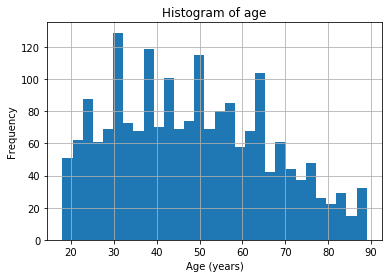

In [4]:
pd.DataFrame.hist(df, column="age", bins = 30)
plt.grid(True)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Histogram of age')

I can also plot more bins in this graph to make it smoother....

Text(0.5,1,'Histogram of age')

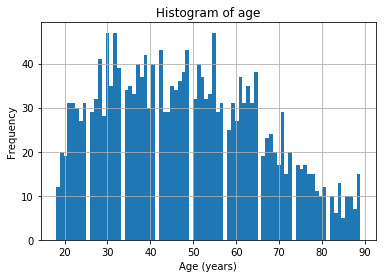

In [5]:
pd.DataFrame.hist(df, column="age", bins = 80)
plt.grid(True)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Histogram of age')

Ok, it looks like is is not smooth. Precisely speaking, there are some ages without observations (25). In a large small, things like this would be strange. However, considering that we have only near 2,000 observations, then some age groups can really take no observations.

I would also like to plot a boxplot for age:

Text(0,0.5,'Age')

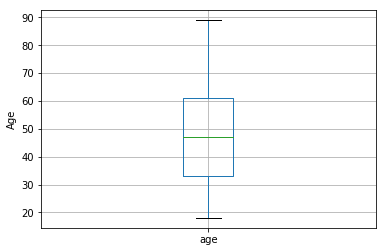

In [6]:
df.boxplot("age")
plt.ylabel('Age')

It looks like the median of age in this sample is around 48.

We can also plot a histogram of number of children:

Text(0.5,1,'Histogram of Number of Children')

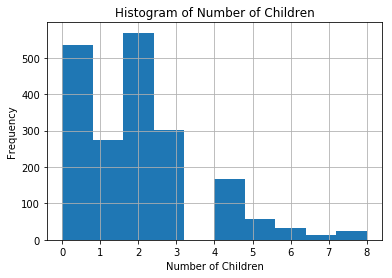

In [7]:
pd.DataFrame.hist(df, column="childs", bins = 10)
plt.grid(True)
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Children')

It looks like to majority of the sample have 0-2 children.

We can also evaluate the relationship between children and age.

Text(0.5,1,'Scatter plot of age(x) and childs(y)')

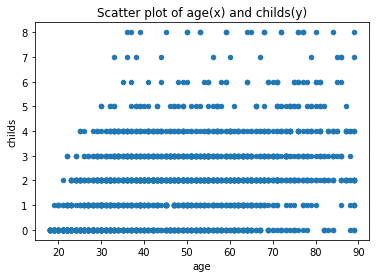

In [8]:
df.plot.scatter('age', 'childs')
plt.title('Scatter plot of age(x) and childs(y)')

Opps, it looks like there's much noise here and we cannot assume there is a linear relationship.

I guess a more meaningful way of doing this is to use the boxplot.

D:\Users\Jiang\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


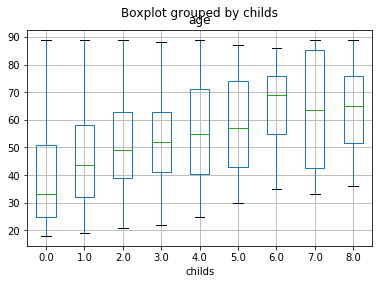

In [9]:
df.boxplot("age", "childs") 

Ok, then. We can know that generally people with more children tend to be older.

This can also be fulfilled by the following graph:

Text(0.5,1,'Age and childs')

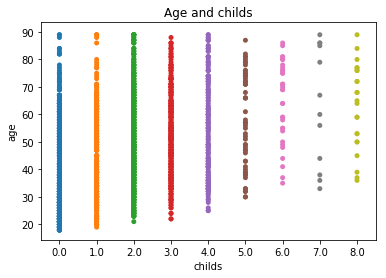

In [10]:
sns.stripplot(x="childs", y="age", data=df)
plt.title('Age and childs')

We can also examine the relationship between hours of watching tv and number of children:

Text(0.5,1,'Hours per day watching TV and childs')

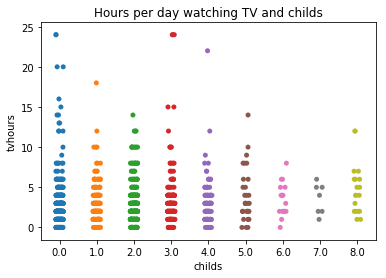

In [11]:
sns.stripplot(x="childs", y="tvhours", data=df, jitter=True)
plt.title('Hours per day watching TV and childs')

The above can be also fulfilled by a swarmplot.

Text(0.5,1,'Hours per day watching TV and childs')

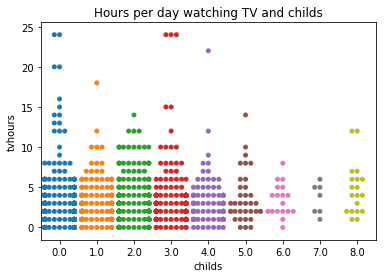

In [12]:
sns.swarmplot(x="childs", y="tvhours", data=df)
plt.title('Hours per day watching TV and childs')

Let's check their interaction with gender:

Text(0.5,1,'Hours per day watching TV, childs, and gender')

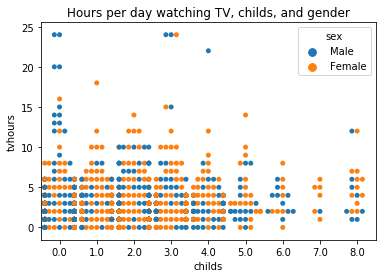

In [13]:
sns.swarmplot(x="childs", y="tvhours", hue="sex", data=df)
plt.title('Hours per day watching TV, childs, and gender')

I am also interested in the gender distribution of the sample:

Text(0.5,1,'Gender Distribution')

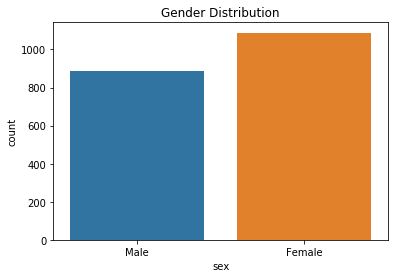

In [14]:
sns.countplot(x="sex", data=df)
plt.title('Gender Distribution')

There are more females than males in this sample.

We can also get the distribution of race in this sample:

Text(0.5,1,'Race Distribution')

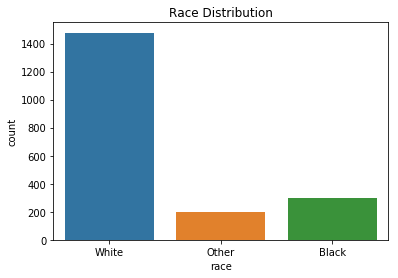

In [15]:
sns.countplot(x="race", data=df)
plt.title('Race Distribution')

Most of the observations are whites

What about marital status?

Text(0.5,1,'Marital Status')

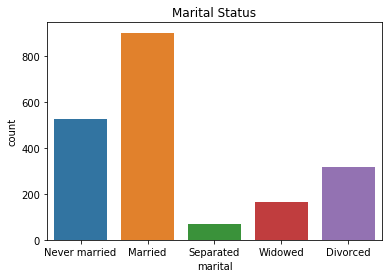

In [16]:
sns.countplot(x="marital", data=df)
plt.title('Marital Status')

A significant number of the observations are married.

Again, we can use boxplot to assess grouping difference:

D:\Users\Jiang\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


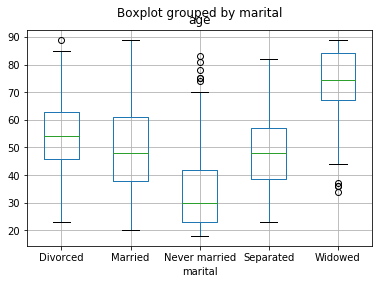

In [17]:
df.boxplot("age", "marital") 

We can find out there are some outliers in the group never married, and some in the group widowed.

What about their educational attainment?

Text(0.5,1,'Educational Attainment')

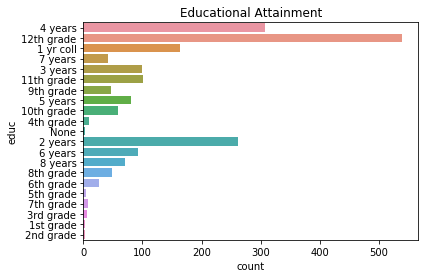

In [18]:
sns.countplot(y="educ", data=df)
plt.title('Educational Attainment')

Opps, the coding looks a bit messy

Let's look at abortion:

Text(0.5,1,'Abortion')

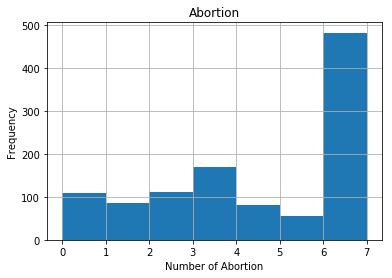

In [19]:
pd.DataFrame.hist(df, column="abortion", bins = 7)
plt.grid(True)
plt.xlabel('Number of Abortion')
plt.ylabel('Frequency')
plt.title('Abortion')

## Work Status

Where do they work?

Text(0.5,1,'Work Status')

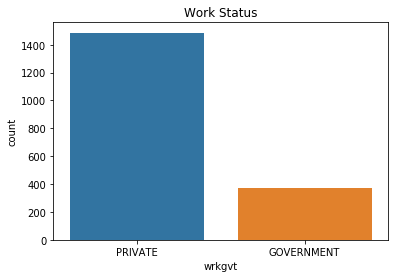

In [20]:
sns.countplot(x="wrkgvt", data=df)
plt.title('Work Status')

The majority of them work in the private sector.

I guess there are more females that work in the government, grab a graph to affirm my assumption:

Text(0.5,1,'Work Status by Gender')

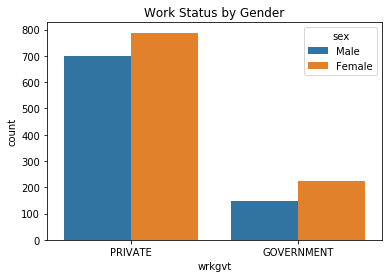

In [21]:
sns.countplot(x="wrkgvt", hue="sex", data=df)
plt.title('Work Status by Gender')

It looks my guess is correct

## Political Views

#### For this, I created a new variable called Political generation cohort. More details are explained in my paper.

Text(0.5,1,'Political views grouped by gender')

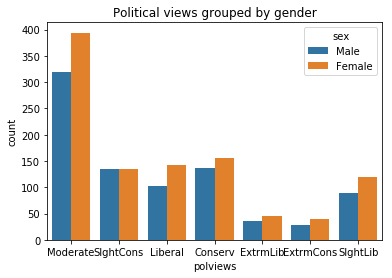

In [22]:
sns.countplot(x="polviews", hue="sex", data=df)
plt.title('Political views grouped by gender')

Opps, it looks like we cannot tell the differences because females are oversampled.

Text(0.5,1,'Political views grouped by race')

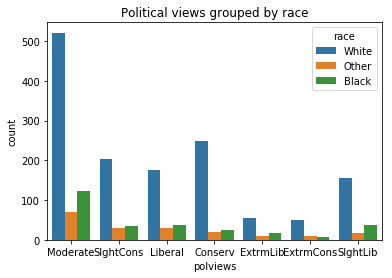

In [23]:
sns.countplot(x="polviews", hue="race", data=df)
plt.title('Political views grouped by race')

Even though whites are oversampled, we can observed that more white are conservative compared with other racial groups.

Text(0.5,1,'Confidence in government grouped by gender')

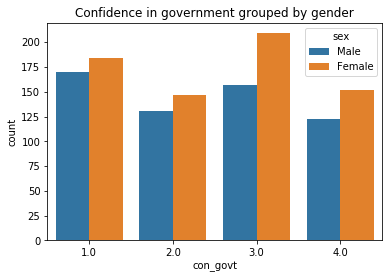

In [24]:
sns.countplot(x="con_govt", hue="sex", data=df)
plt.title('Confidence in government grouped by gender')

We can also check Americans' confidence in their government.

Text(0.5,1,'Confidence in government grouped by race')

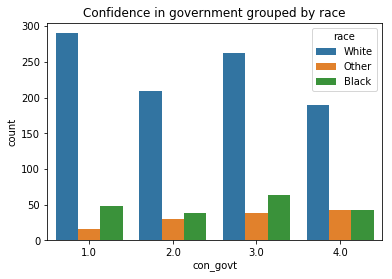

In [25]:
sns.countplot(x="con_govt", hue="race", data=df)
plt.title('Confidence in government grouped by race')

We can Also check their ideas on social security.

Text(0.5,1,'Social security grouped by race')

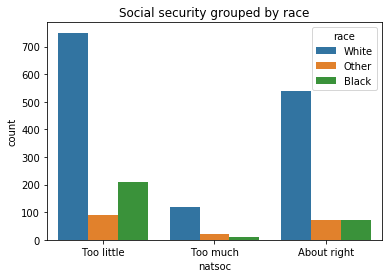

In [26]:
sns.countplot(x="natsoc", hue="race", data=df)
plt.title('Social security grouped by race')

Text(0.5,1,'Social Security grouped by race')

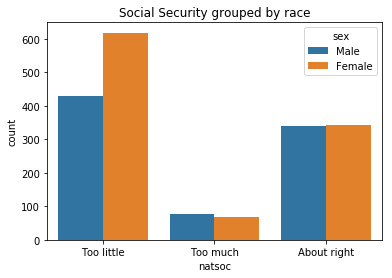

In [27]:
sns.countplot(x="natsoc", hue="sex", data=df)
plt.title('Social Security grouped by race')

Opps, at least this graph shows that Females compared with males think that we need more welfare.

I would like to do more about poltiical views, which is also the topic of my paper.

Text(0.5,1,'Political views grouped by Generation cohort')

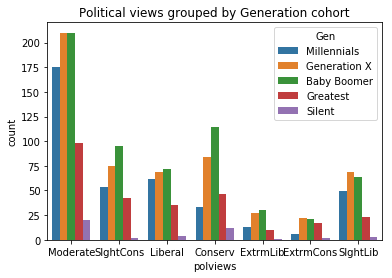

In [28]:
sns.countplot(x="polviews", hue="Gen", data=df)
plt.title('Political views grouped by Generation cohort')

This is a graph of political views grouped by Generation cohorts (Millennials, Generation X)...

To make sure my coding is correct, I am going to show a violin graph

Text(0.5,1,'Age and generation cohorts')

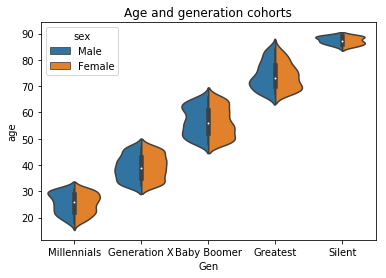

In [29]:
sns.violinplot(x="Gen", y="age", hue="sex", data=df, split=True)
plt.title('Age and generation cohorts')

You can see most of the people in the 'Silent' cohort are above 85.

This can also be fulfilled by a double boxplot

Text(0.5,1,'Age and generation cohorts')

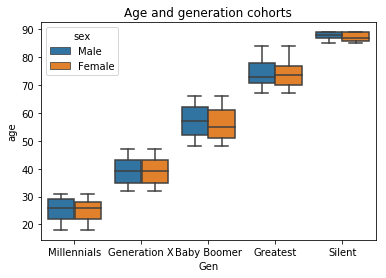

In [30]:
sns.boxplot(x="Gen", y="age", hue="sex", data=df)
plt.title('Age and generation cohorts')

We can also evaluate their hours per day watching TV

Text(0.5,1,'Hours watching TV and generation cohorts')

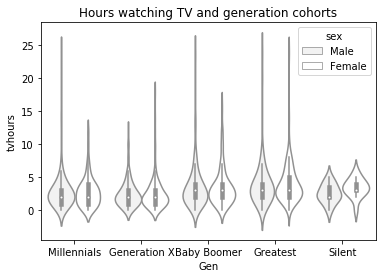

In [31]:
sns.violinplot(x="Gen", y="tvhours", hue='sex', data=df, color="w", alpha=.5)
plt.title('Hours watching TV and generation cohorts')

To end this part, I am going to do more on political views

Text(0.5,1,'Favor or Oppose death Penalty grouped by Generation cohort')

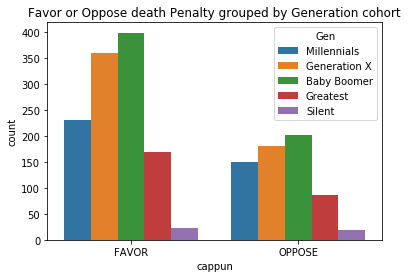

In [32]:
sns.countplot(x="cappun", hue="Gen", data=df)
plt.title('Favor or Oppose death Penalty grouped by Generation cohort')

Text(0.5,1,'Support Affirmative Action grouped by Generation cohort')

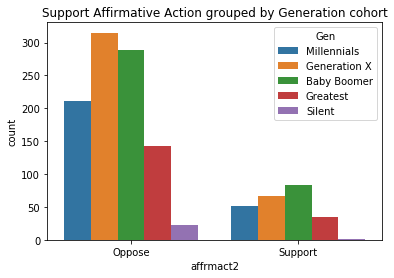

In [33]:
sns.countplot(x="affrmact2", hue="Gen", data=df)
plt.title('Support Affirmative Action grouped by Generation cohort')

Text(0.5,1,'Did you vote in 2008 grouped by Generation cohort')

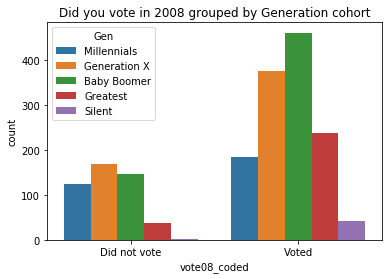

In [34]:
sns.countplot(x="vote08_coded", hue='Gen', data=df)
plt.title('Did you vote in 2008 grouped by Generation cohort')

Text(0.5,1,'Hours per day watching TV, childs, and gender')

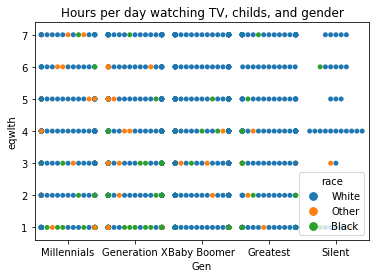

In [35]:
sns.swarmplot(x="Gen", y="eqwlth", hue="race", data=df)
plt.title('Hours per day watching TV, childs, and gender')

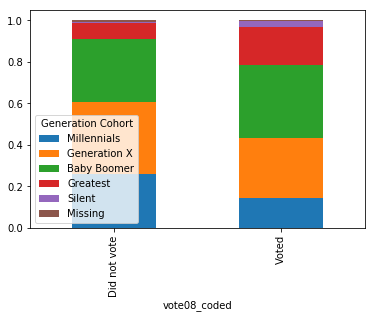

In [36]:
df['Generation Cohort'] = df.Gen.fillna('Missing')
a = df.groupby([ 'vote08_coded', 'Generation Cohort']).size()/df.groupby([ 'vote08_coded']).size()
df_unstack = a.unstack()
df_unstack[['Millennials', 'Generation X', 'Baby Boomer', 'Greatest', 'Silent','Missing']].plot.bar(stacked=True)

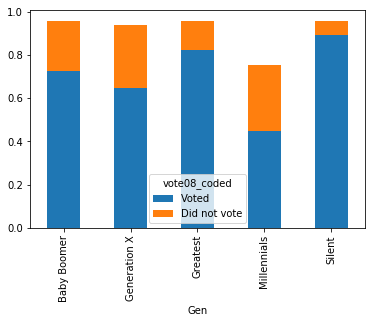

In [37]:
a = df.groupby([ 'Gen', 'vote08_coded']).size()/df.groupby([ 'Gen']).size()
df2_unstack = a.unstack()
df2_unstack[['Voted', 'Did not vote']].plot.bar(stacked=True)

Having all these information, we can no proceed with our research